In [201]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from collections import Counter


In [202]:
from IPython.display import HTML

HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
 } else {
 $('div.input').show();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code show/hide"></form>''')

# eICU

In [203]:
# Upload files
readm_sourses= pd.read_csv ('Readmission_sourses.csv')
readm_sourses_mimic= pd.read_csv ('Readmission_sourses_MIMIC_IV.csv')

readm_sourses['num_of_sourse'] = list(range(readm_sourses.shape[0]))
readm_sourses_mimic['num_of_sourse'] = list(range(readm_sourses_mimic.shape[0]))

readm_1st_move= pd.read_csv ('Readm_1move.csv')
readm_1st_move_mimic= pd.read_csv ('Readm_1move_MIMIC_IV.csv')

readm_2st_move= pd.read_csv ('Readm_2move.csv')
readm_2st_move_mimic= pd.read_csv ('Readm_2move_MIMIC_IV.csv')

discharge= pd.read_csv ('discharge.csv')
discharge_mimic= pd.read_csv ('discharge_MIMIC_IV.csv')

In [204]:
#readm_2st_move

In [205]:
def res_name_2_num(res_name):
    return readm_sourses['num_of_sourse'][readm_sourses['source_name']==res_name].values[0]    

In [206]:
#list(zip(source,colour_list_link))

In [207]:
sourses_from_num=list(readm_1st_move['hospitalid'].apply(res_name_2_num))
sourses_to_num=list(readm_1st_move['unittype_1'].apply(res_name_2_num))

sourses_from_num_2=list(readm_2st_move['unittype_1'].apply(res_name_2_num))
sourses_to_num_2=list(readm_2st_move['unittype_2'].apply(res_name_2_num))

discharge_from=list(discharge['unittype_2'].apply(res_name_2_num))
discharge_to=list(discharge['unitdischargelocation_2'].apply(res_name_2_num))

In [208]:
def res_name_2_num_mimic(res_name):
    return readm_sourses_mimic['num_of_sourse'][readm_sourses_mimic['source_name']==res_name].values[0]        
       

In [209]:
sourses_from_num_mimic=list(readm_1st_move_mimic['numbedscategory'].apply(res_name_2_num_mimic))
sourses_to_num_mimic=list(readm_1st_move_mimic['first_careunit'].apply(res_name_2_num_mimic))

sourses_from_num_2_mimic=list(readm_2st_move_mimic['first_careunit'].apply(res_name_2_num_mimic))
sourses_to_num_2_mimic=list(readm_2st_move_mimic['second_careunit'].apply(res_name_2_num_mimic))

discharge_from_mimic=list(discharge_mimic['second_careunit'].apply(res_name_2_num_mimic))
discharge_to_mimic=list(discharge_mimic['discharge_location'].apply(res_name_2_num_mimic))

In [210]:
readm_1st_move['sourses_from_num']=sourses_from_num
readm_1st_move['sourses_to_num']=sourses_to_num
readm_2st_move['sourses_from_num_2']=sourses_from_num_2
readm_2st_move['sourses_to_num_2']=sourses_to_num_2
discharge['discharge_from']=discharge_from
discharge['discharge_to']=discharge_to

In [211]:
readm_1st_move_mimic['sourses_from_num']=sourses_from_num_mimic
readm_1st_move_mimic['sourses_to_num']=sourses_to_num_mimic
readm_2st_move_mimic['sourses_from_num_2']=sourses_from_num_2_mimic
readm_2st_move_mimic['sourses_to_num_2']=sourses_to_num_2_mimic
discharge_mimic['discharge_from']=discharge_from_mimic
discharge_mimic['discharge_to']=discharge_to_mimic

# Scheme of transfers between first and second admission to ICU (eICU dataset).

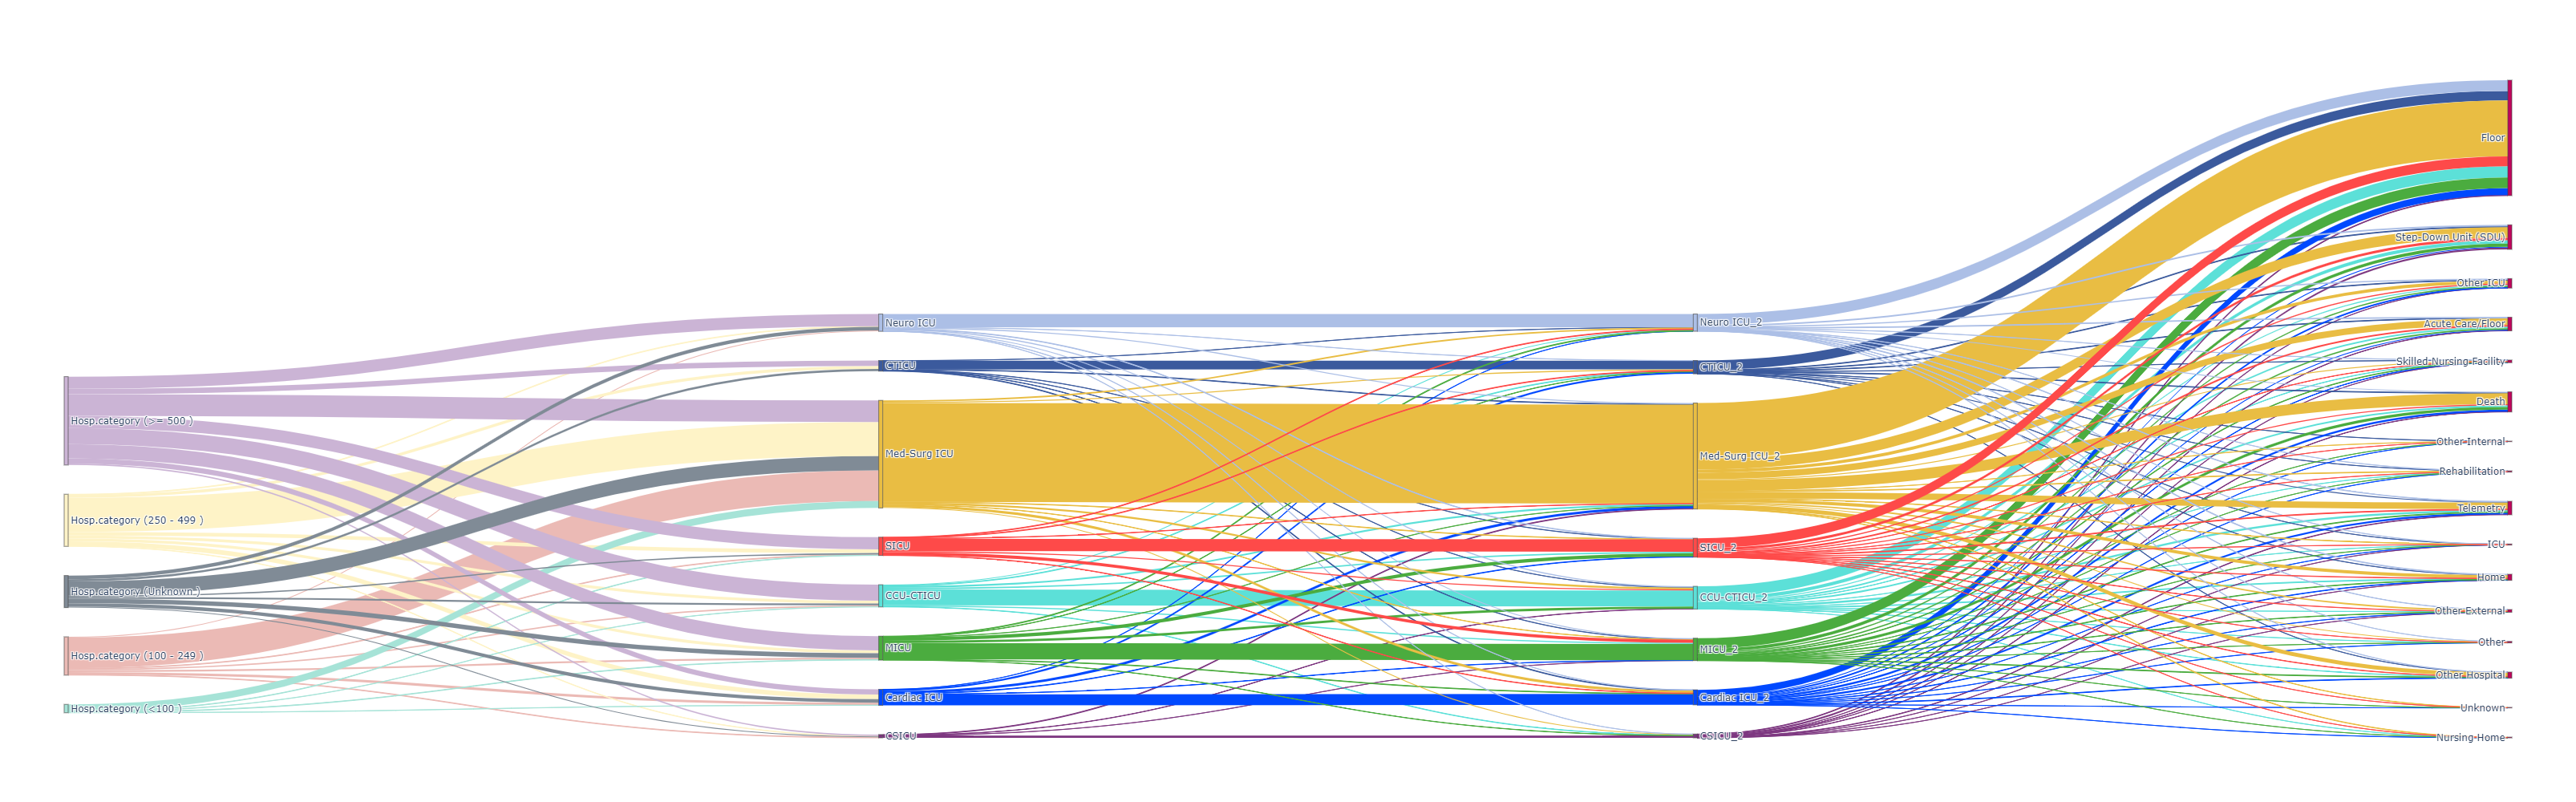

In [212]:
color_node = ['#EBBAB5', '#FEF3C7', '#A6E3D7', '#CBB4D5','#808B96',   
              '#7D3780', '#E9BD43', '#5CE0D8', '#0049FF', '#ACBFE6', '#4BAC3F',  '#FE4A49', '#3b5a9d',
              '#7D3780', '#E9BD43', '#ACBFE6', '#0049FF',  '#5CE0D8',  '#4BAC3F',  '#FE4A49', '#3b5a9d',
              '#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C'] 

color_link = ['#EBBAB5', '#FEF3C7', '#A6E3D7', '#CBB4D5','#808B96',
              '#7D3780', '#E9BD43', '#5CE0D8', '#0049FF', '#ACBFE6', '#4BAC3F',  '#FE4A49', '#3b5a9d',
              '#7D3780', '#E9BD43', '#ACBFE6', '#0049FF',  '#5CE0D8',  '#4BAC3F',  '#FE4A49', '#3b5a9d',]
        
label = list(readm_sourses['source_name'])
source=list(readm_1st_move['sourses_from_num'])
source.extend(list(readm_2st_move['sourses_from_num_2']))
source.extend(list(discharge['discharge_from']))

colour_list_link=[]
for i in Counter(source).keys():
    for k in range(source.count(i)):
        colour_list_link.append(color_link[i])
        
target=list(readm_1st_move['sourses_to_num'])
target.extend(list(readm_2st_move['sourses_to_num_2']))
target.extend(list(discharge['discharge_to']))

value=list(readm_1st_move['num_of_admissions_1'])
value.extend(list(readm_2st_move['num_of_admissions_2']))
value.extend(list(discharge['num_of_discharge']))



link = dict(source = source, target = target, value = value, color=colour_list_link)
node = dict(label = label, pad=50, thickness=5, color=color_node)
data = go.Sankey(link = link, node=node,valueformat = ".0f",)

# plot
fig = go.Figure(data)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

In [213]:
readmission_rate_by_unittype_eICU= pd.read_csv ('eICU_readmission_rate_by_unittype.csv')
readmission_rate_by_hosp_category_eICU= pd.read_csv ('eICU_readmission_rate_by_hosp_category.csv')
readmission_rate_by_hospitals_eICU= pd.read_csv ('eICU_readmission_rate_by_hospitals.csv')

In [214]:
readmission_rate_by_unittype_eICU_plot=readmission_rate_by_unittype_eICU.rename(columns={"num_of_cases_without_readm": "non_readm", "num_of_cases_readmission": "readm"})
readmission_rate_by_hosp_category_eICU_plot=readmission_rate_by_hosp_category_eICU.rename(columns={"num_of_cases_without_readm": "non_readm", "num_of_cases_readmission": "readm"})
readmission_rate_by_hospitals_eICU_plot=readmission_rate_by_hospitals_eICU.rename(columns={"num_of_cases_without_readm": "non_readm", "num_of_cases_readmission": "readm"})

# Readmission by type of ICU. eICU

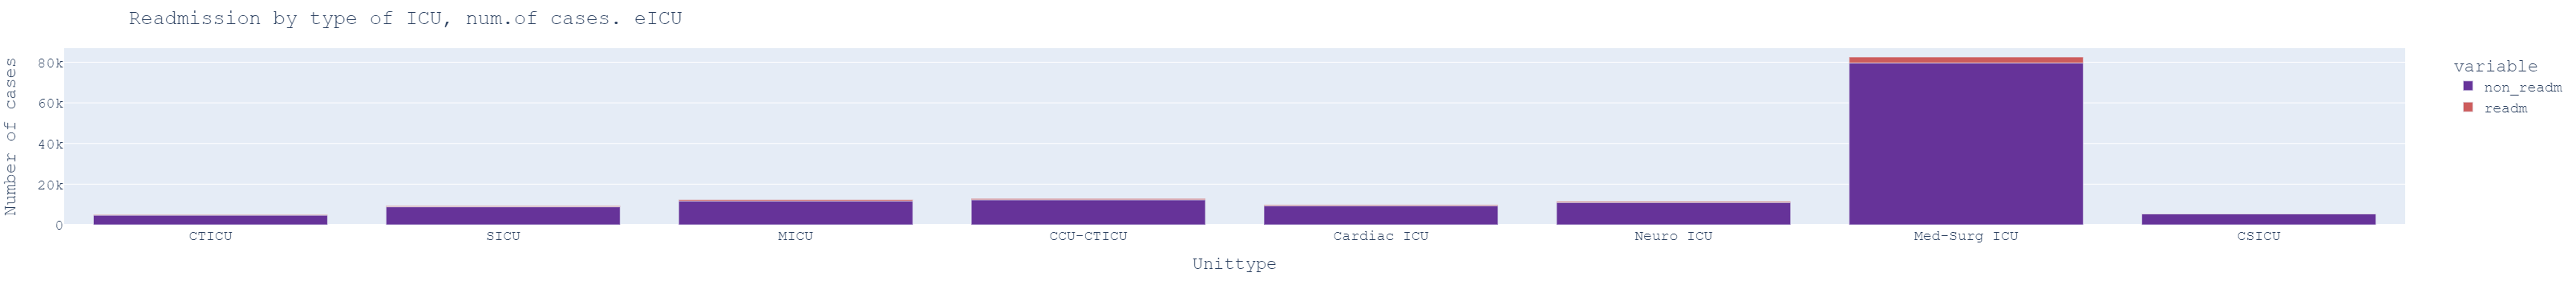

In [215]:
fig = px.bar(readmission_rate_by_unittype_eICU_plot, x="unittype", y=["non_readm","readm"], color_discrete_map={"non_readm": "RebeccaPurple", "readm": "#cd5c5c"},)
#fig.show()
fig.update_layout(
    title="Readmission by type of ICU, num.of cases. eICU",
    xaxis_title="Unittype",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
    )
)

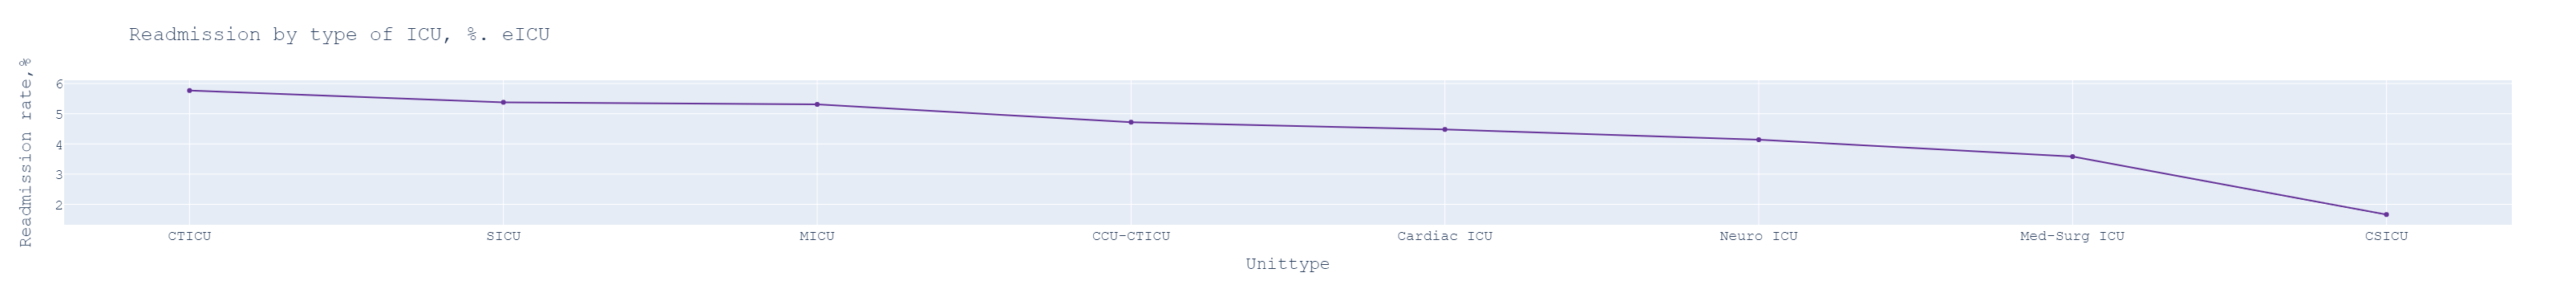

In [216]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=readmission_rate_by_unittype_eICU_plot['unittype'],
    y=readmission_rate_by_unittype_eICU_plot['perc'],
    line=dict(color="RebeccaPurple"),
    connectgaps=True # override default to connect the gaps
))

fig.update_layout(
    title="Readmission by type of ICU, %. eICU",
    xaxis_title="Unittype",
    yaxis_title="Readmission rate,%",
    font=dict(
        family="Courier New, monospace",
        size=18,
        #
    )
)

# Readmission by hospital category. eICU

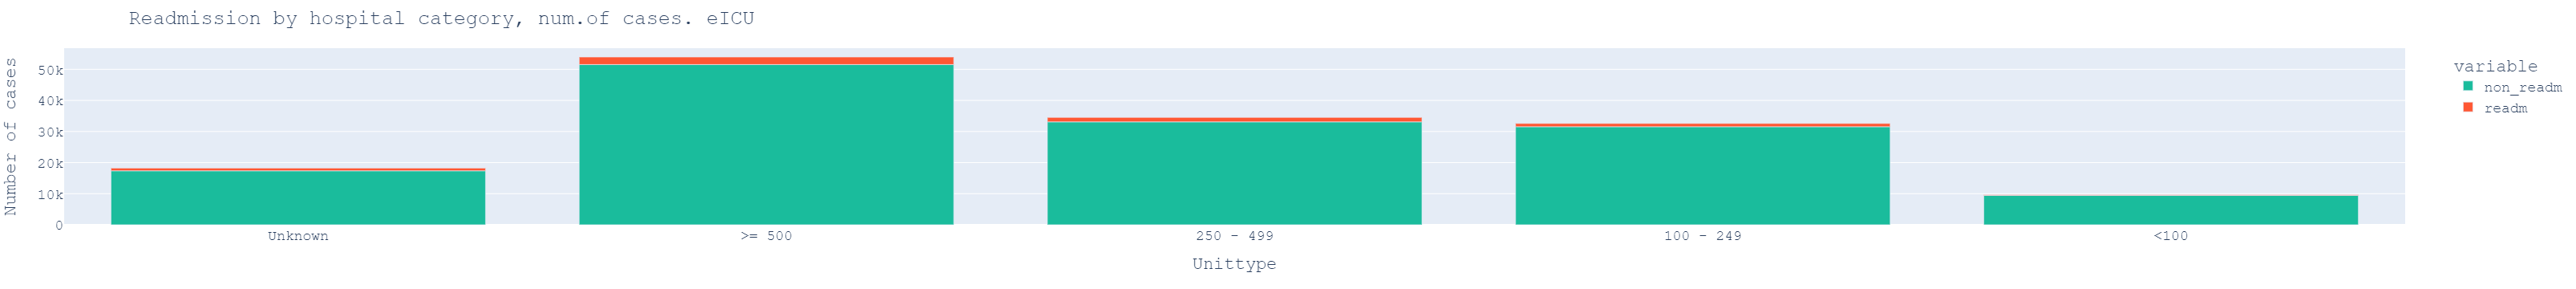

In [217]:
fig = px.bar(readmission_rate_by_hosp_category_eICU_plot, x="numbedscategory", y=["non_readm","readm"], color_discrete_map={"non_readm": "#1ABC9C", "readm": "#FF5733"},)
#fig.show()
fig.update_layout(
    title="Readmission by hospital category, num.of cases. eICU",
    xaxis_title="Unittype",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
    )
)

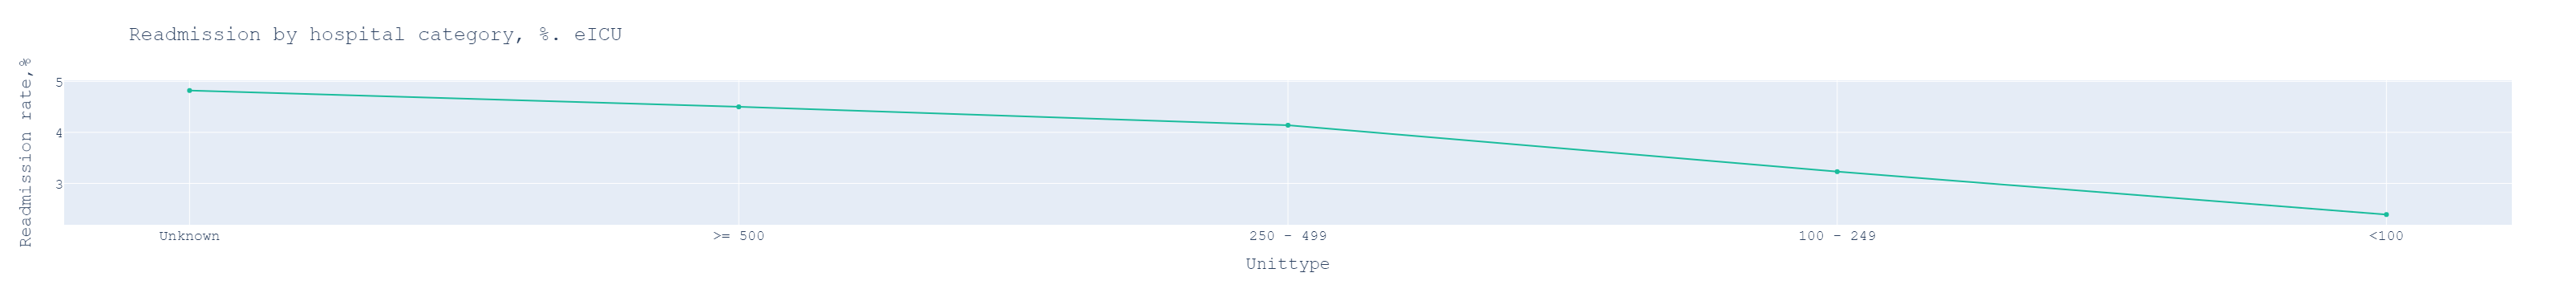

In [218]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=readmission_rate_by_hosp_category_eICU_plot['numbedscategory'],
    y=readmission_rate_by_hosp_category_eICU_plot['perc'],
    line=dict(color="#1ABC9C"),
    connectgaps=True # override default to connect the gaps
))

fig.update_layout(
    title="Readmission by hospital category, %. eICU",
    xaxis_title="Unittype",
    yaxis_title="Readmission rate,%",
    font=dict(
        family="Courier New, monospace",
        size=18,
        #
    )
)

# MIMCI IV

# Scheme of transfers between first and second admission to ICU (MIMIC IV dataset). 

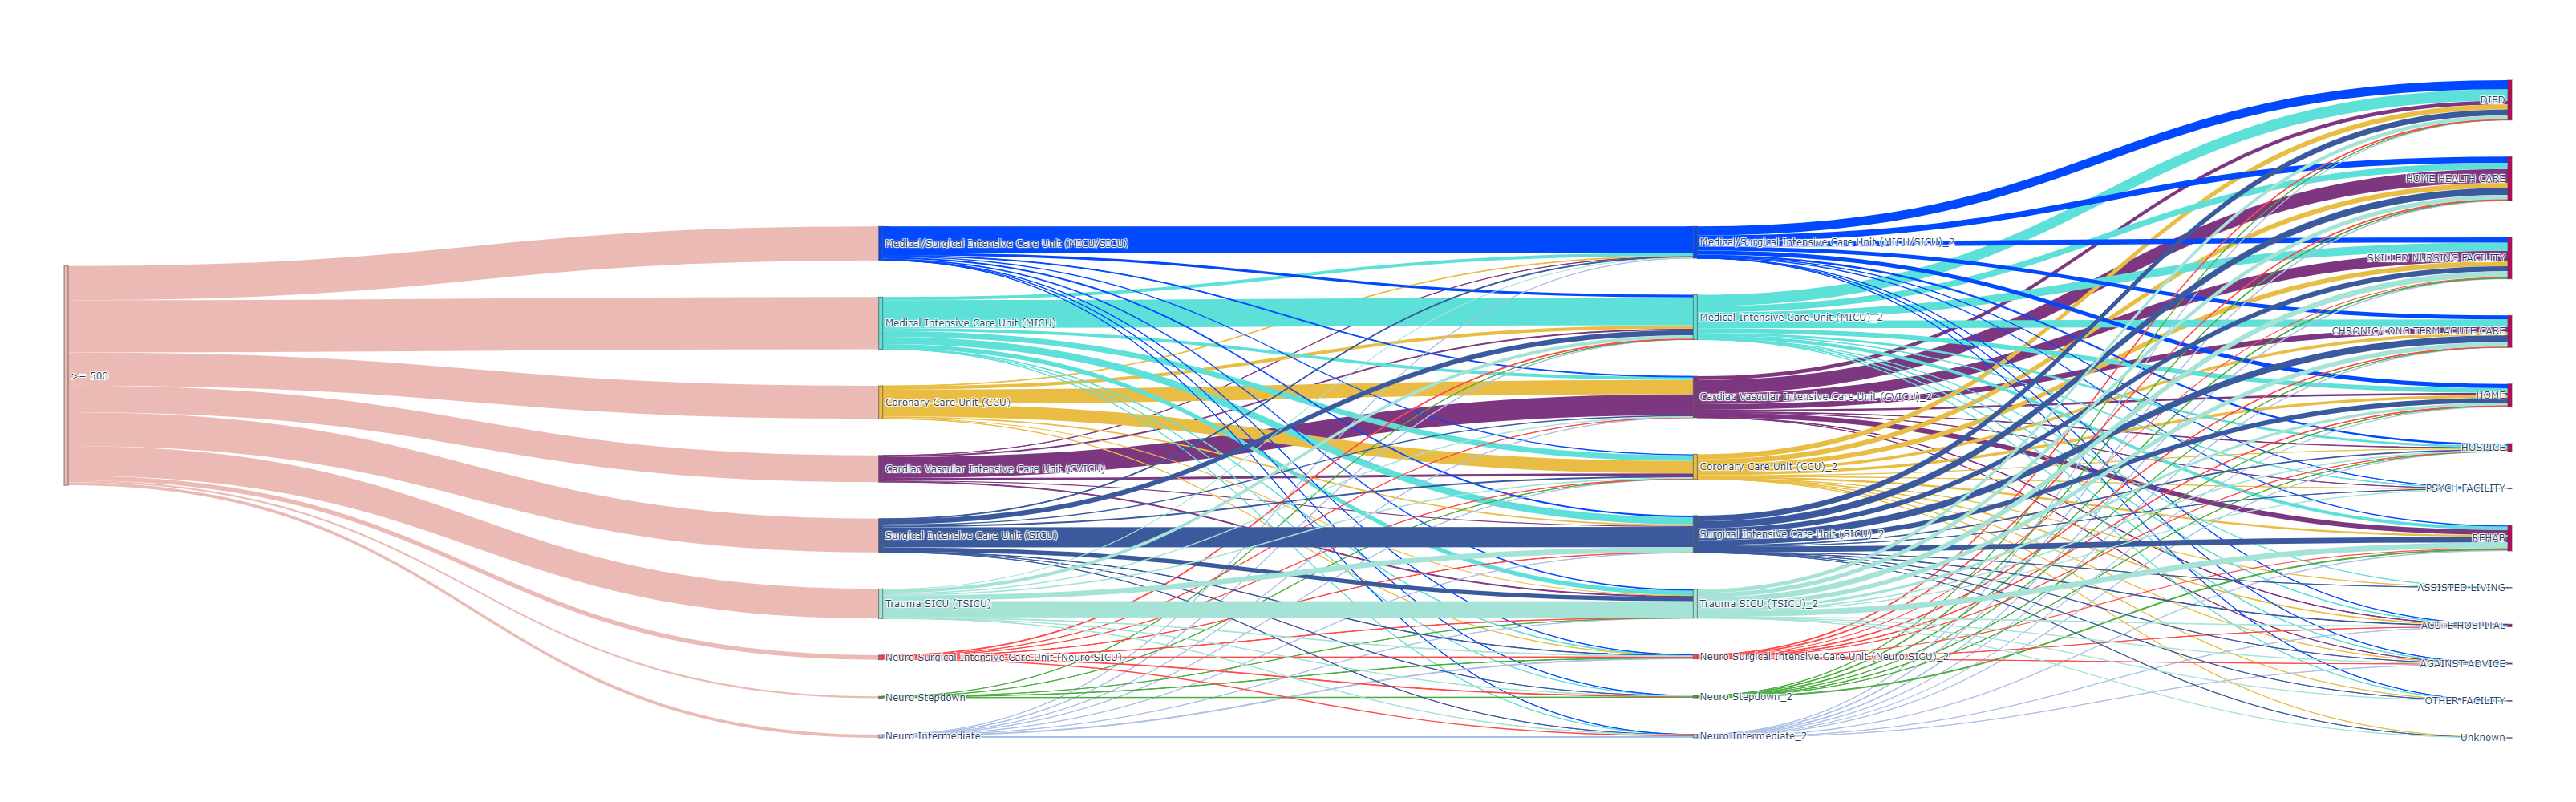

In [219]:
color_node = ['#EBBAB5', 
              '#7D3780', '#E9BD43', '#5CE0D8', '#0049FF', '#ACBFE6', '#4BAC3F',  '#FE4A49', '#3b5a9d','#A6E3D7',
               '#7D3780', '#E9BD43', '#5CE0D8', '#0049FF', '#ACBFE6', '#4BAC3F',  '#FE4A49', '#3b5a9d','#A6E3D7',
              '#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C'] 

color_link = ['#EBBAB5',               
              '#7D3780', '#E9BD43', '#5CE0D8', '#0049FF', '#ACBFE6', '#4BAC3F',  '#FE4A49', '#3b5a9d','#A6E3D7',
              '#7D3780', '#E9BD43', '#5CE0D8', '#0049FF', '#ACBFE6', '#4BAC3F',  '#FE4A49', '#3b5a9d','#A6E3D7',]

        
label = list(readm_sourses_mimic['source_name'])
source=list(readm_1st_move_mimic['sourses_from_num'])
source.extend(list(readm_2st_move_mimic['sourses_from_num_2']))
source.extend(list(discharge_mimic['discharge_from']))

colour_list_link=[]
for i in Counter(source).keys():
    for k in range(source.count(i)):
        colour_list_link.append(color_link[i])
        
target=list(readm_1st_move_mimic['sourses_to_num'])
target.extend(list(readm_2st_move_mimic['sourses_to_num_2']))
target.extend(list(discharge_mimic['discharge_to']))

value=list(readm_1st_move_mimic['num_of_admissions_1'])
value.extend(list(readm_2st_move_mimic['num_of_admissions_2']))
value.extend(list(discharge_mimic['num_of_admissions_3']))



link = dict(source = source, target = target, value = value, color=colour_list_link)
node = dict(label = label, pad=50, thickness=5, color=color_node)
data = go.Sankey(link = link, node=node,valueformat = ".0f",)

# plot
fig = go.Figure(data)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    )
fig.show()

# Admission rate by ICU type (MIMIC IV)

In [220]:
readmission_rate_by_unittype_mimic= pd.read_csv ('MIMIC_readmission_rate_by_unittype.csv')
readmission_rate_by_unittype_mimic_plot=readmission_rate_by_unittype_mimic.rename(columns={"num_of_cases_without_readm": "non_readm", "num_of_cases_readmission": "readm"})

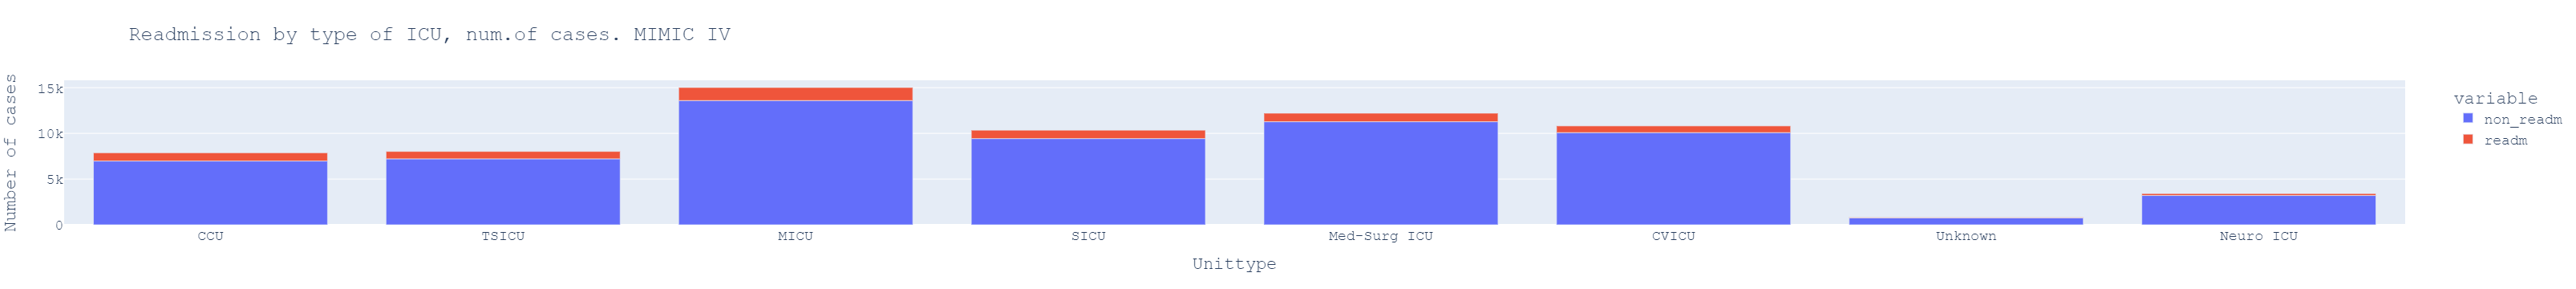

In [221]:

fig = px.bar(readmission_rate_by_unittype_mimic_plot, x="unittype", y=["non_readm","readm"], title="Wide-Form Input")
#fig.show()
fig.update_layout(
    title="Readmission by type of ICU, num.of cases. MIMIC IV",
    xaxis_title="Unittype",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
        #color="#7f7f7f"
    )
)

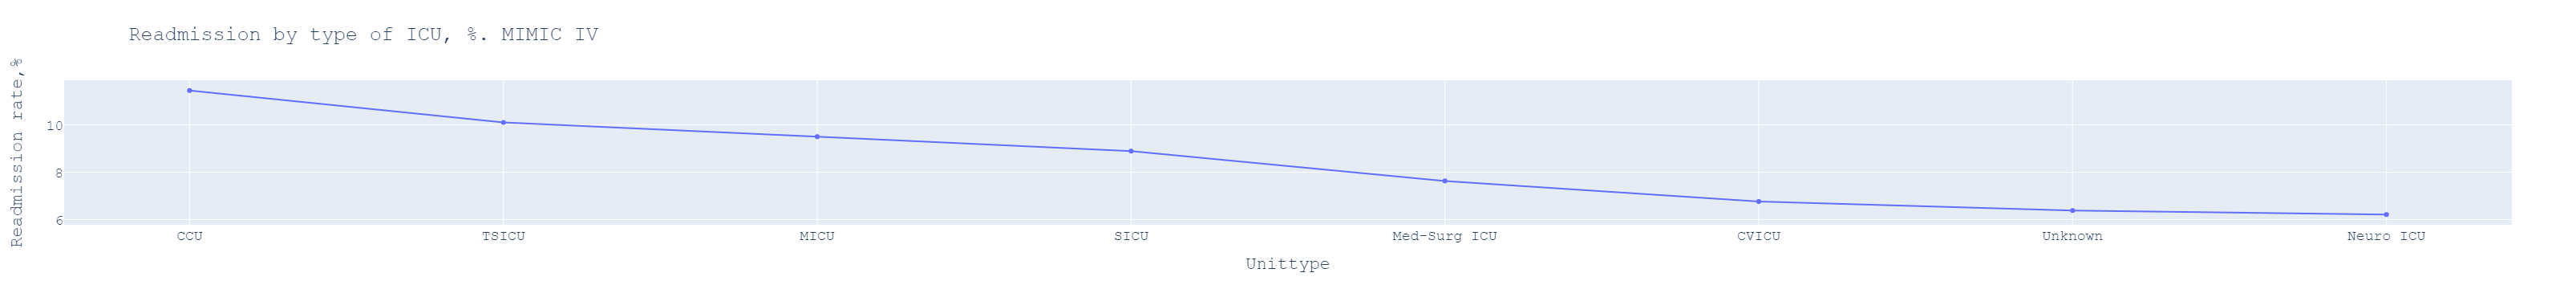

In [222]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=readmission_rate_by_unittype_mimic_plot['unittype'],
    y=readmission_rate_by_unittype_mimic_plot['perc'],
    #name = 'Life expectancy in Canada', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))

fig.update_layout(
    title="Readmission by type of ICU, %. MIMIC IV",
    xaxis_title="Unittype",
    yaxis_title="Readmission rate,%",
    font=dict(
        family="Courier New, monospace",
        size=18,
        #color="#7f7f7f"
    )
)